In [1]:
!pip install polars
!pip install seaborn
!pip install pyarrow


[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import os
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
def read_parquet_by_type(train_path: str):
    # Lấy tất cả các file parquet trong thư mục
    files = [os.path.join(train_path, f) for f in os.listdir(train_path) if f.endswith('.parquet')]
    
    # Phân loại các file theo loại tên
    user_chunk_files = [file for file in files if 'user_chunk' in file]
    purchase_history_chunk_files = [file for file in files if 'purchase_history_daily_chunk' in file]
    item_chunk_files = [file for file in files if 'item_chunk' in file]
    
    # Đọc các file riêng biệt thành DataFrame
    user_chunk_df = pl.concat([pl.read_parquet(file) for file in user_chunk_files]) if user_chunk_files else None
    purchase_history_chunk_df = pl.concat([pl.read_parquet(file) for file in purchase_history_chunk_files]) if purchase_history_chunk_files else None
    item_chunk_df = pl.concat([pl.read_parquet(file) for file in item_chunk_files]) if item_chunk_files else None
    
    # Trả về một dictionary chứa các DataFrame
    return {
        "user_chunk": user_chunk_df,
        "purchase_history_chunk": purchase_history_chunk_df,
        "item_chunk": item_chunk_df
    }

In [4]:
train_path = 'D:/01_UIT_study/HKVI/CS116/02_Final-Project/Item-Recommendation-Dataset'
dataframes = read_parquet_by_type(train_path)

df_user = dataframes["user_chunk"]
df_purchase = dataframes["purchase_history_chunk"]
df_item = dataframes["item_chunk"]

# Head information of each Chunk

In [5]:
print("User Chunk DataFrame:")
df_user.head()

User Chunk DataFrame:


customer_id,gender,location,province,membership,timestamp,created_date,updated_date,sync_status_id,last_sync_date,sync_error_message,region,location_name,install_app,install_date,district,user_id,is_deleted
i32,str,i32,str,str,i64,datetime[μs],datetime[μs],i32,datetime[μs],str,str,str,str,i64,str,str,bool
14732,"""Nam""",155,"""Hồ Chí Minh""","""Standard""",1306357911,2011-05-25 21:11:51.677,2025-07-07 15:33:10.201316,2,2025-07-16 11:54:29.816986,null,"""Đông Nam Bộ""","""HCM - Grand View Phú Mỹ Hưng""","""In-Store""",1306281600,"""7""","""e1e48206652bf8c279ff0206c69a80…",false
15126,"""Nữ""",300,"""Hồ Chí Minh""","""Standard""",1306357911,2011-05-25 21:11:51.677,2025-07-07 15:33:10.201316,2,2025-07-16 11:54:29.816986,null,"""Đông Nam Bộ""","""HCM - 121A Nguyễn Duy Trinh""","""In-Store""",1306281600,"""Thủ Đức""","""77891759204bd27e69fb11a7b92889…",false
29718,"""Nữ""",157,"""Bến Tre""","""Standard""",1312126692,2011-07-31 15:38:12.750,2025-07-07 15:33:10.201316,2,2025-07-16 11:54:29.816986,null,"""Đồng bằng sông Cửu Long""","""BTR - 179 Nguyễn Đình Chiểu""","""In-Store""",1582070400,"""Bến Tre""","""b8041b584a0bb6655361727a0a6108…",false
30077,"""Nữ""",53,"""Hồ Chí Minh""","""Standard""",1314302782,2011-08-25 20:06:22.797,2025-07-07 15:33:10.201316,2,2025-07-16 11:54:29.816986,null,"""Đông Nam Bộ""","""HCM - 101 Trần Quang Khải""","""In-Store""",1314230400,"""1""","""c52ceaca44a83ec41a219cfaff0e05…",false
30085,"""Nữ""",660,"""Hồ Chí Minh""","""Standard""",1314310024,2011-08-25 22:07:04.267,2025-07-07 15:33:10.201316,2,2025-07-16 11:54:29.816986,null,"""Đông Nam Bộ""","""HCM - 85-87 Tây Thạnh""","""In-Store""",1314230400,"""Tân Phú""","""74ac5764f5d67d341aacf238d7762f…",false


In [6]:
print("Purchase Chunk DataFrame:")
df_purchase.head()

Purchase Chunk DataFrame:


timestamp,user_id,item_id,event_type,event_value,price,date_key,quantity,customer_id,created_date,updated_date,channel,payment,location,discount,is_deleted
i64,str,str,str,"decimal[38,4]","decimal[38,4]",i32,i32,i32,datetime[μs],datetime[μs],str,str,i32,"decimal[38,4]",bool
1735064221,"""ca12702ddf55acaa9fb767e10faaa6…","""7115000000004""","""Purchase""",1.0000,49000.0000,20241224,1,5254214,2024-12-24 18:17:01.027,2024-12-24 18:20:09.453,"""In-Store""","""VietQR""",656,0.0000,false
1735068481,"""54314ce86269f4849f9a4c3fc85d94…","""0029130000030""","""Purchase""",1.0000,69000.0000,20241224,1,7573232,2024-12-24 19:28:01.870,2024-12-24 19:28:01.870,"""In-Store""","""Tiền mặt""",143,0.0000,false
1735069843,"""4799de4022b58689b2b9fb37122479…","""3496000000053""","""Purchase""",2.0000,75000.0000,20241224,2,8187418,2024-12-24 19:50:43.760,2024-12-24 19:50:43.760,"""In-Store""","""MoMo""",213,0.0000,false
1735069779,"""4799de4022b58689b2b9fb37122479…","""2700000000002""","""Purchase""",2.0000,58500.0000,20241224,2,8187418,2024-12-24 19:49:39.223,2024-12-24 19:49:39.223,"""In-Store""","""MoMo""",213,13000.0000,false
1735379373,"""3b2423f730815273dfd6f6220b0c5c…","""0029110000036""","""Purchase""",1.0000,89000.0000,20241228,1,6931560,2024-12-28 09:49:33.780,2024-12-28 10:28:49.413,"""Android""","""MoMo""",590,10000.0000,false


In [7]:
print("User Item DataFrame:")
df_item.head()

User Item DataFrame:


p_id,item_id,price,category_l1_id,category_l1,category_l2_id,category_l2,category_l3_id,category_l3,category_id,category,description,brand,manufacturer,creation_timestamp,is_deleted,created_date,updated_date,sync_status_id,last_sync_date,sync_error_message,image_url,gender_target,age_group,item_type,gp,weight,color,size,origin,volume,material,sale_status,description_new
i32,str,"decimal[38,4]",i32,str,i32,str,i32,str,i32,str,str,str,str,i64,bool,datetime[μs],datetime[μs],i32,datetime[μs],str,str,str,str,str,"decimal[38,4]",f32,str,str,str,str,str,i32,str
17065,"""0502020000004""",99000.0000,1,"""Babycare""",35,"""Bình sữa, phụ kiện""",7050,"""Núm ty""",7058,"""Núm ty Dr Brown""","""Không xác định""","""Dr.Brown's""","""Không xác định""",1333531544,false,2012-04-04 09:25:44.240,2025-08-18 09:59:19.847,2,2025-07-18 17:59:29.898256,null,"""Không xác định""","""Không xác định""","""Không xác định""","""Không xác định""",36828.0000,null,"""Không xác định""","""Không xác định""","""Không xác định""","""Không xác định""","""Không xác định""",0,"""Chi tiết sản phẩm …"
72370,"""0010290040150""",69000.0000,3292,"""Thời trang""",3958,"""Cơ cấu hàng cũ""",7007,"""Thời trang bé trai, bé gái cũ""",6987,"""Bộ quần áo bé gái""","""Không xác định""","""Con Cưng""","""Không xác định""",1503046250,false,2017-08-18 08:50:50.713,2025-09-18 16:05:42.360,null,null,null,"""Không xác định""","""Bé Gái""","""Từ 3Y""","""Bộ quần áo""",0.0000,null,"""Không xác định""","""Không xác định""","""Không xác định""","""Không xác định""","""Không xác định""",0,"""Không xác định"""
31154,"""0008010000015""",45000.0000,351,"""Đồ chơi & Sách""",2033,"""0-1Y""",2118,"""Gặm nướu""",2121,"""Gặm nướu khác""","""- Chất liệu: Sản phẩm được làm…","""Thương hiệu khác""","""Không xác định""",1358501584,false,2013-01-18 09:33:04.260,2025-09-27 00:05:36.233,2,2025-07-18 17:59:29.898256,null,"""Không xác định""","""Không xác định""","""Không xác định""","""Không xác định""",14490.0000,null,"""Không xác định""","""Không xác định""","""Không xác định""","""Không xác định""","""Không xác định""",0,"""Chi tiết sản phẩm …"
46123,"""0020010000094""",401000.0000,2222,"""Tã""",2272,"""Merries""",2275,"""Merries""",2276,"""Merries_Sơ Sinh""","""﻿﻿Tã dán Merries size S 82 miế…","""Merries Nhật""","""Không xác định""",1400062039,false,2014-05-14 10:07:19.603,2025-09-27 00:05:36.233,2,2025-07-18 17:59:29.898256,null,"""Không xác định""","""Không xác định""","""Không xác định""","""Không xác định""",59749.0000,null,"""Không xác định""","""Không xác định""","""Nhật Bản, Nhật Bản""","""Không xác định""","""Giấy, bột giấy, vải không dệt,…",0,"""Không xác định"""
46127,"""0020010000098""",401000.0000,2222,"""Tã""",2272,"""Merries""",2275,"""Merries""",2278,"""Merries_Tã Quần""","""﻿﻿﻿Bỉm tã quần Merries size M …","""Merries Nhật""","""Không xác định""",1400062040,false,2014-05-14 10:07:20.370,2025-09-27 00:05:36.233,2,2025-07-18 17:59:29.898256,null,"""Không xác định""","""Không xác định""","""Không xác định""","""Không xác định""",65764.0000,null,"""Không xác định""","""Không xác định""","""Nhật Bản, Nhật Bản""","""Không xác định""","""Giấy, bột giấy, vải không dệt,…",0,"""Không xác định"""


# Task 3

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from scipy.stats import spearmanr

# # ---------- Function to calculate Pearson correlation for numeric columns ----------
# def calculate_pearson_correlation(df, num_cols):
#     """
#     Calculate Pearson correlation matrix for numeric columns in Polars DataFrame using NumPy
#     """
#     # Convert Polars DataFrame to NumPy array
#     data = df[num_cols].to_numpy()

#     # Compute Pearson correlation matrix using NumPy
#     correlation_matrix = np.corrcoef(data, rowvar=False)
#     correlation_matrix_df = pd.DataFrame(correlation_matrix, columns=num_cols, index=num_cols)

#     return correlation_matrix_df

# # ---------- Function to calculate Spearman correlation for numeric columns ----------
# def calculate_spearman_correlation(df, num_cols):
#     """
#     Calculate Spearman correlation matrix for numeric columns in Polars DataFrame using scipy
#     """
#     # Convert Polars DataFrame to NumPy array
#     data = df[num_cols].to_numpy()

#     # Compute Spearman correlation matrix using scipy
#     correlation_matrix, _ = spearmanr(data, axis=0)
#     correlation_matrix_df = pd.DataFrame(correlation_matrix, columns=num_cols, index=num_cols)

#     return correlation_matrix_df

# ---------- Function to calculate Pearson correlation for numeric columns ----------
def calculate_pearson_correlation(df, num_cols):
    """
    Calculate Pearson correlation matrix for numeric columns in Polars DataFrame using NumPy
    """
    # Convert Polars DataFrame columns to float (if they're decimals)
    df_float = df.select([pl.col(col).cast(pl.Float64) for col in num_cols])
    
    # Convert to NumPy array
    data = df_float.to_numpy()

    # Compute Pearson correlation matrix using NumPy
    correlation_matrix = np.corrcoef(data, rowvar=False)
    correlation_matrix_df = pd.DataFrame(correlation_matrix, columns=num_cols, index=num_cols)

    return correlation_matrix_df

# ---------- Function to calculate Spearman correlation for numeric columns ----------
def calculate_spearman_correlation(df, num_cols):
    """
    Calculate Spearman correlation matrix for numeric columns in Polars DataFrame using scipy
    """
    # Convert Polars DataFrame columns to float (if they're decimals)
    df_float = df.select([pl.col(col).cast(pl.Float64) for col in num_cols])
    
    # Convert to NumPy array
    data = df_float.to_numpy()

    # Compute Spearman correlation matrix using scipy
    correlation_matrix, _ = spearmanr(data, axis=0)
    correlation_matrix_df = pd.DataFrame(correlation_matrix, columns=num_cols, index=num_cols)

    return correlation_matrix_df

# ---------- Function to calculate Cramér's V for categorical features ----------
def cramers_v(confusion_matrix):
    chi2, p, dof, ex = chi2_contingency(confusion_matrix)
    if chi2 == 0:
        return 0
    else:
        return np.sqrt(chi2 / (confusion_matrix.sum() * (min(confusion_matrix.shape) - 1)))

# ---------- Generalized function to compute Cramér's V for category-category pairs ----------
def compute_cramers_v(df, cat_cols):
    results = {}
    cramers_v_matrix = pd.DataFrame(index=cat_cols, columns=cat_cols)

    for i, col1 in enumerate(cat_cols):
        for col2 in cat_cols[i:]:
            if col1 == col2:
                v_value = 1.0  # self-correlation
            if col1 in df.columns and col2 in df.columns:
                contingency_table = pd.crosstab(df[col1], df[col2])
                v_value = cramers_v(contingency_table.values)
                cramers_v_matrix.at[col1, col2] = v_value
                cramers_v_matrix.at[col2, col1] = v_value  # Symmetric matrix
    cramers_v_matrix = cramers_v_matrix.fillna(0)
    return cramers_v_matrix

# ---------- Function to plot heatmap ----------
def plot_heatmap(correlation_matrix, title, cmap="coolwarm", annot=True, figsize=(10, 8)):
    plt.figure(figsize=figsize)
    sns.heatmap(correlation_matrix, annot=annot, cmap=cmap, center=0, linewidths=0.5)
    plt.title(title, fontsize=16)
    plt.show()

# ---------- Function to identify and remove redundant features ----------
def remove_redundant_features(df, num_cols, cat_cols, correlation_threshold=0.9, cramers_v_threshold=0.9):
    # Step 1: Handle numeric features - remove highly correlated numeric features
    correlation_matrix = calculate_correlation(df, num_cols, method="pearson")

    # Identify highly correlated numeric features
    to_remove_num_features = set()
    for i in range(len(correlation_matrix.columns)):
        for j in range(i):
            if abs(correlation_matrix.iloc[i, j]) > correlation_threshold:
                colname = correlation_matrix.columns[i]
                to_remove_num_features.add(colname)

    # Step 2: Handle categorical features - remove highly related categorical features (using Cramér's V)
    cramers_v_matrix = compute_cramers_v(df, cat_cols)
    
    # Identify highly related categorical features based on Cramér's V
    to_remove_cat_features = set()
    for col1 in cat_cols:
        for col2 in cat_cols:
            if col1 != col2 and cramers_v_matrix.at[col1, col2] > cramers_v_threshold:
                to_remove_cat_features.add(col2)

    # Combine features to remove (both numeric and categorical)
    to_remove_features = list(to_remove_num_features | to_remove_cat_features)
    
    # # Step 3: Remove redundant features from the dataframe
    # df_reduced = df.drop(columns=to_remove_features)
    
    # return df_reduced, to_remove_features
    return to_remove_features

## Corelation of User

C:\Users\T14\AppData\Local\Temp\ipykernel_32424\2509493560.py:58: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  cramers_v_matrix = cramers_v_matrix.fillna(0)


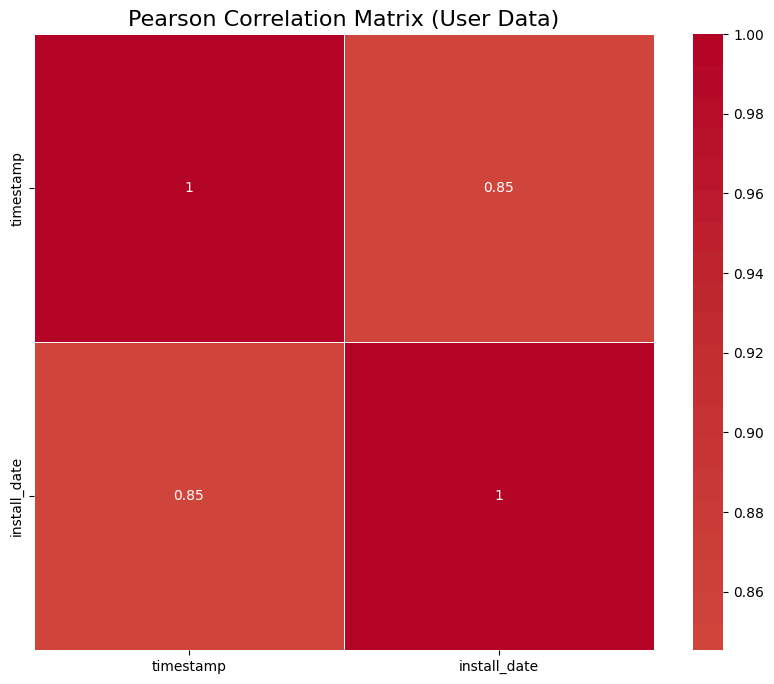

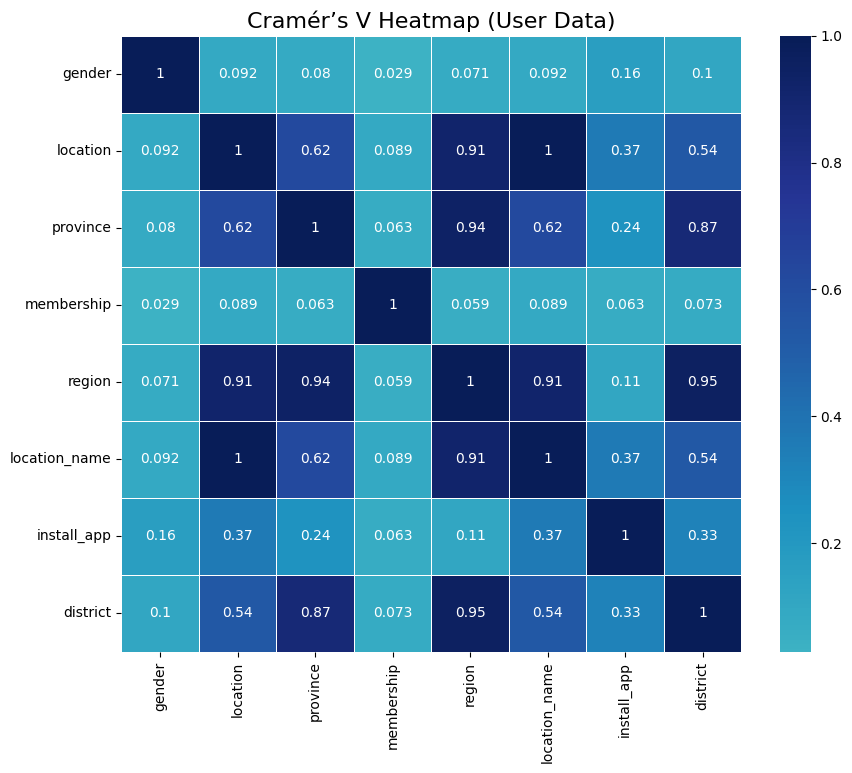

In [15]:
# ---------- Example usage for df_user, df_purchase, and df_item ----------

# List of numeric and categorical columns
user_num_cols = ['timestamp', 'install_date']  # Replace with actual numeric columns
user_cat_cols = ['gender', 'location', 'province', 'membership', 'region', 'location_name', 'install_app', 'district']  # Replace with actual categorical columns

# Assuming df_user is loaded as a Pandas DataFrame
# Compute correlation matrices and Cramér's V matrices

# For df_user (user data)
user_corr_matrix = calculate_pearson_correlation(df_user, user_num_cols)
user_cramers_v_matrix = compute_cramers_v(df_user, user_cat_cols)

# ---------- Visualizing the Correlation and Cramér's V Matrices ----------

# For df_user (user data)
plot_heatmap(user_corr_matrix, "Pearson Correlation Matrix (User Data)", cmap="coolwarm", annot=True)
plot_heatmap(user_cramers_v_matrix, "Cramér’s V Heatmap (User Data)", cmap="YlGnBu", annot=True)

## Corelation of Purchase

C:\Users\T14\AppData\Local\Temp\ipykernel_32424\591959314.py:92: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  cramers_v_matrix = cramers_v_matrix.fillna(0)


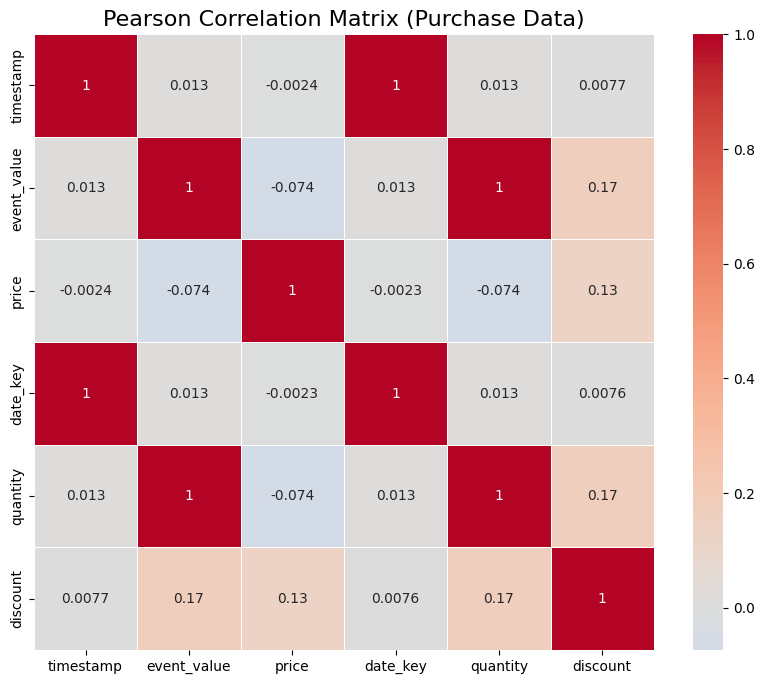

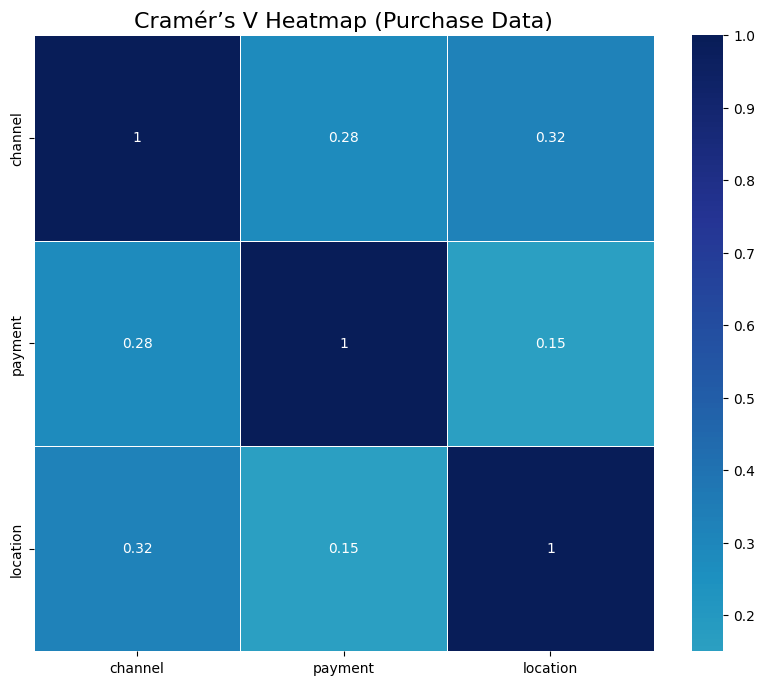

In [ ]:
# ---------- Example usage for df_user, df_purchase, and df_item ----------

# List of numeric and categorical columns
purchase_num_cols = ['timestamp', 'event_value', 'price', 'date_key', 'quantity', 'discount']  # Replace with actual numeric columns
purchase_cat_cols = ['channel', 'payment', 'location']  # Replace with actual categorical columns

# Assuming df_user is loaded as a Pandas DataFrame
# Compute correlation matrices and Cramér's V matrices

# For df_purchase (purchase data)
purchase_corr_matrix = calculate_pearson_correlation(df_purchase, purchase_num_cols)
purchase_cramers_v_matrix = compute_cramers_v(df_purchase, purchase_cat_cols)

# ---------- Visualizing the Correlation and Cramér's V Matrices ----------

# For df_purchase (purchase data)
plot_heatmap(purchase_corr_matrix, "Pearson Correlation Matrix (Purchase Data)", cmap="coolwarm", annot=True)
plot_heatmap(purchase_cramers_v_matrix, "Cramér’s V Heatmap (Purchase Data)", cmap="YlGnBu", annot=True)

## Corelation of Item

C:\Users\T14\AppData\Local\Temp\ipykernel_32424\591959314.py:92: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  cramers_v_matrix = cramers_v_matrix.fillna(0)


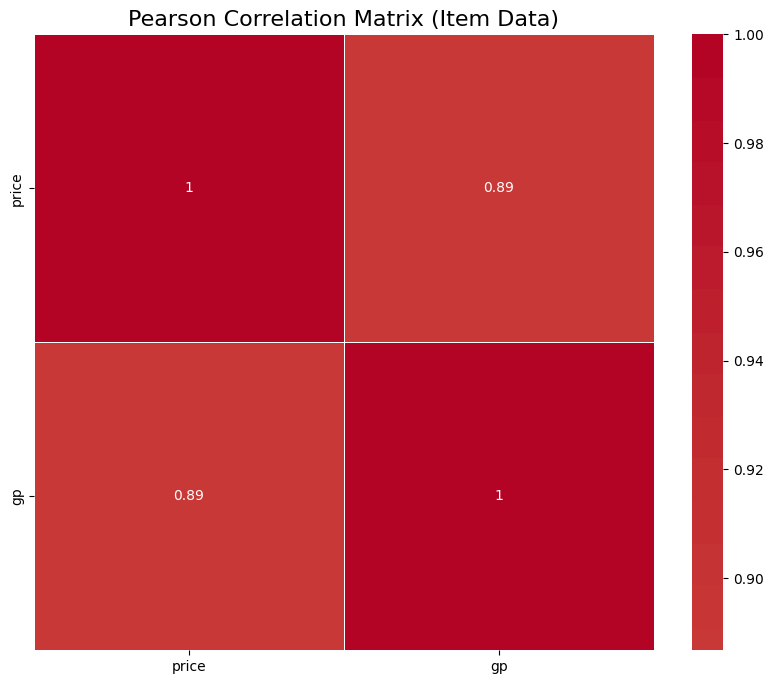

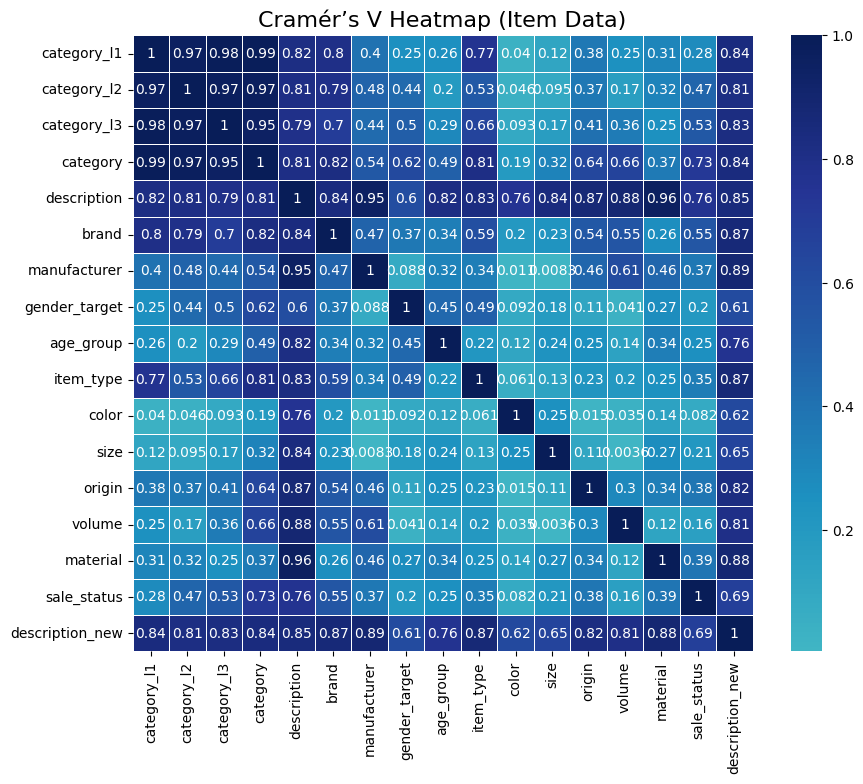

In [19]:
# ---------- Example usage for df_user, df_purchase, and df_item ----------

# List of numeric and categorical columns
item_num_cols = ['price', 'gp'] 
item_cat_cols = ['category_l1', 'category_l2', 'category_l3', 'category', 'description', 'brand', 'manufacturer', 'gender_target', 'age_group', 'item_type', 'color', 'size', 'origin', 'volume', 'material', 'sale_status', 'description_new']

# Assuming df_user is loaded as a Pandas DataFrame
# Compute correlation matrices and Cramér's V matrices

# For df_item (item data)
item_corr_matrix = calculate_pearson_correlation(df_item, item_num_cols)
item_cramers_v_matrix = compute_cramers_v(df_item, item_cat_cols)

# ---------- Visualizing the Correlation and Cramér's V Matrices ----------

# For df_item (item data)
plot_heatmap(item_corr_matrix, "Pearson Correlation Matrix (Item Data)", cmap="coolwarm", annot=True)
plot_heatmap(item_cramers_v_matrix, "Cramér’s V Heatmap (Item Data)", cmap="YlGnBu", annot=True)

# Identity Redundant Features

## Overall

In [30]:
# Define a threshold for identifying redundant features (e.g., 0.9 for correlation and Cramér's V)
correlation_threshold = 0.9
cramers_v_threshold = 0.9

# Function to identify redundant numeric features based on correlation
def identify_redundant_numeric_features(corr_matrix, threshold):
    redundant_features = set()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                redundant_features.add(colname)
    return list(redundant_features)

# Function to identify redundant categorical features based on Cramér's V
def identify_redundant_categorical_features(cramers_v_matrix, threshold):
    redundant_features = set()
    for col1 in cramers_v_matrix.columns:
        for col2 in cramers_v_matrix.columns:
            if col1 != col2 and cramers_v_matrix.at[col1, col2] > threshold:
                redundant_features.add(col2)  # Add redundant feature
    return list(redundant_features)

# Identify redundant numeric features from the correlation matrix
redundant_numeric_features_user = identify_redundant_numeric_features(user_corr_matrix, correlation_threshold)
redundant_numeric_features_purchase = identify_redundant_numeric_features(purchase_corr_matrix, correlation_threshold)
redundant_numeric_features_item = identify_redundant_numeric_features(item_corr_matrix, correlation_threshold)

# Identify redundant categorical features from the Cramér’s V matrix
redundant_categorical_features_user = identify_redundant_categorical_features(user_cramers_v_matrix, cramers_v_threshold)
redundant_categorical_features_purchase = identify_redundant_categorical_features(purchase_cramers_v_matrix, cramers_v_threshold)
redundant_categorical_features_item = identify_redundant_categorical_features(item_cramers_v_matrix, cramers_v_threshold)

# Combine redundant features
all_redundant_features_user = redundant_numeric_features_user + redundant_categorical_features_user
all_redundant_features_purchase = redundant_numeric_features_purchase + redundant_categorical_features_purchase
all_redundant_features_item = redundant_numeric_features_item + redundant_categorical_features_item

# Print results
print("Redundant Numeric Features (User Data):", redundant_numeric_features_user)
print("Redundant Categorical Features (User Data):", redundant_categorical_features_user)
print("All Redundant Features (User Data):", all_redundant_features_user)

print()

print("Redundant Numeric Features (Purchase Data):", redundant_numeric_features_purchase)
print("Redundant Categorical Features (Purchase Data):", redundant_categorical_features_purchase)
print("All Redundant Features (Purchase Data):", all_redundant_features_purchase)

print()


print("Redundant Numeric Features (Item Data):", redundant_numeric_features_item)
print("Redundant Categorical Features (Item Data):", redundant_categorical_features_item)
print("All Redundant Features (Item Data):", all_redundant_features_item)


Redundant Numeric Features (User Data): []
Redundant Categorical Features (User Data): ['region', 'province', 'district', 'location_name', 'location']
All Redundant Features (User Data): ['region', 'province', 'district', 'location_name', 'location']

Redundant Numeric Features (Purchase Data): ['quantity', 'date_key']
Redundant Categorical Features (Purchase Data): []
All Redundant Features (Purchase Data): ['quantity', 'date_key']

Redundant Numeric Features (Item Data): []
Redundant Categorical Features (Item Data): ['category_l3', 'manufacturer', 'description', 'category', 'material', 'category_l2', 'category_l1']
All Redundant Features (Item Data): ['category_l3', 'manufacturer', 'description', 'category', 'material', 'category_l2', 'category_l1']


## More details

In [37]:
# Function to identify correlated groups based on correlation threshold
def identify_correlated_groups(correlation_matrix, threshold=0.9):
    correlated_groups = []
    processed_features = set()  # To track already processed features
    
    # Create a mask for highly correlated features
    for col1 in correlation_matrix.columns:
        if col1 not in processed_features:  # Only process features that haven't been processed
            group = set([col1])  # Start the group with the current feature
            for col2 in correlation_matrix.columns:
                # If the correlation is above threshold and col2 is not yet in the processed group
                if abs(correlation_matrix.at[col1, col2]) >= threshold and col2 not in processed_features:
                    group.add(col2)
            if group:
                # Add the group to the result and mark these features as processed
                correlated_groups.append(group)
                processed_features.update(group)  # Add all features of this group to processed set
    return correlated_groups

# Function to identify correlated groups based on Cramér’s V threshold
def identify_cramers_v_groups(cramers_v_matrix, threshold=0.9):
    correlated_groups = []
    processed_features = set()  # To track already processed features
    
    for col1 in cramers_v_matrix.columns:
        if col1 not in processed_features:  # Only process features that haven't been processed
            group = set([col1])  # Start the group with the current feature
            for col2 in cramers_v_matrix.columns:
                # If the Cramér’s V value is above threshold and col2 is not yet in the processed group
                if cramers_v_matrix.at[col1, col2] >= threshold and col2 not in processed_features:
                    group.add(col2)
            if group:
                # Add the group to the result and mark these features as processed
                correlated_groups.append(group)
                processed_features.update(group)  # Add all features of this group to processed set
    return correlated_groups

### User Chunk

In [40]:
# Identify correlated feature groups (numeric)
correlated_numeric_groups = identify_correlated_groups(user_corr_matrix, threshold=0.9)

# Identify correlated feature groups (categorical)
correlated_categorical_groups = identify_cramers_v_groups(user_cramers_v_matrix, threshold=0.9)

# Print correlated groups
print("Correlated Numeric Feature Groups (based on Pearson correlation):")
for group in correlated_numeric_groups:
    print(group)

print("\nCorrelated Categorical Feature Groups (based on Cramér’s V):")
for group in correlated_categorical_groups:
    print(group)

Correlated Numeric Feature Groups (based on Pearson correlation):
{'timestamp'}
{'install_date'}

Correlated Categorical Feature Groups (based on Cramér’s V):
{'gender'}
{'region', 'location_name', 'location'}
{'province'}
{'membership'}
{'install_app'}
{'district'}


### Purchase Chunk

In [39]:
# Identify correlated feature groups (numeric)
correlated_numeric_groups = identify_correlated_groups(purchase_corr_matrix, threshold=0.9)

# Identify correlated feature groups (categorical)
correlated_categorical_groups = identify_cramers_v_groups(purchase_cramers_v_matrix, threshold=0.9)

# Print correlated groups
print("Correlated Numeric Feature Groups (based on Pearson correlation):")
for group in correlated_numeric_groups:
    print(group)

print("\nCorrelated Categorical Feature Groups (based on Cramér’s V):")
for group in correlated_categorical_groups:
    print(group)

Correlated Numeric Feature Groups (based on Pearson correlation):
{'timestamp', 'date_key'}
{'event_value', 'quantity'}
{'price'}
{'discount'}

Correlated Categorical Feature Groups (based on Cramér’s V):
{'channel'}
{'payment'}
{'location'}


### Item Chunk

In [38]:
# Identify correlated feature groups (numeric)
correlated_numeric_groups = identify_correlated_groups(item_corr_matrix, threshold=0.9)

# Identify correlated feature groups (categorical)
correlated_categorical_groups = identify_cramers_v_groups(item_cramers_v_matrix, threshold=0.9)

# Print correlated groups
print("Correlated Numeric Feature Groups (based on Pearson correlation):")
for group in correlated_numeric_groups:
    print(group)

print("\nCorrelated Categorical Feature Groups (based on Cramér’s V):")
for group in correlated_categorical_groups:
    print(group)

Correlated Numeric Feature Groups (based on Pearson correlation):
{'price'}
{'gp'}

Correlated Categorical Feature Groups (based on Cramér’s V):
{'category_l3', 'category_l2', 'category_l1', 'category'}
{'description', 'material', 'manufacturer'}
{'brand'}
{'gender_target'}
{'age_group'}
{'item_type'}
{'color'}
{'size'}
{'origin'}
{'volume'}
{'sale_status'}
{'description_new'}


# User chunk

| Cột              | Giữ / Loại bỏ       | Lý do                                                                                                               |
| ---------------- | ------------------- | ------------------------------------------------------------------------------------------------------------------- |
| `customer_id`, `user_id`    | ✅ Giữ| |
| `gender`         | ✅ Giữ               | |
| `location`       | ✅ Giữ               | |
| `province`       | ✅ Giữ                |  |
| `region`         | ❌ Loại bỏ               | Tương đồng với location|
| `membership`     | ✅ Giữ               |   |
| `install_app`    | ✅ Giữ               |  |

# Purchase chunk

| Cột            | Giữ / Loại bỏ | Lý do                                                                                                                                             |
| -------------- | ------------- | ------------------------------------------------------------------------------------------------------------------------------------------------- |
| `timestamp`    | ✅ Giữ         |  |
| `user_id`      | ✅ Giữ         |             |
| `item_id`      | ✅ Giữ         |       |
| `price`        | ✅ Giữ         |                            |
| `quantity`     | ✅ Giữ         |                                                  |
| `customer_id`  | ✅ Giữ         |   |
| `created_date` | ✅ Giữ         ||
| `payment`      | ✅ Giữ         |                 |
| `location`     | ✅ Giữ         |          |
| `discount`     | ✅ Giữ         |                                                         |
| `channel`      | ✅ Giữ         |           |

# Item

| Cột                  | Giữ / Loại bỏ       | Lý do                                                                                                                                                    |
| -------------------- | ------------------- | -------------------------------------------------------------------------------------------------------------------------------------------------------- |
| `created_date`       | ✅ Giữ               |     |
| `creation_timestamp` | ✅ Giữ               |  |
| `price`              | ✅ Giữ            |  |
| `gp` (gross profit)  | ✅ Giữ               | |
| `category`        | ✅ Giữ               |                |
| `category_l1`        | ✅ Giữ               |                |
| `category_l2`        | ❌ Loại bỏ               |         |
| `category_l3`        | ❌ Loại bỏ              |     |
| `gender_target`      | ✅ Giữ |   |
| `sale_status`        | ✅ Giữ               |      |
| `p_id`               | ✅ Giữ               |  |
